In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# PROBLEM 1
# 𝐻0 :  𝜇𝑀  -  𝜇𝐹  = 0
# 𝐻𝐴 :  𝜇𝑀  -  𝜇𝐹   ≠  0
Weight_loss_Male   = [ 3.69, 4.12, 4.65, 3.19,  4.34, 3.68, 4.12, 4.50, 3.70, 3.09,3.65, 4.73, 3.93, 3.46, 3.28, 4.43, 4.13, 3.62, 3.71, 2.92]
Weight_loss_Female = [2.99, 1.80, 3.79, 4.12, 1.76, 3.50, 3.61, 2.32, 3.67, 4.26, 4.57, 3.01, 3.82, 4.33, 3.40, 3.86]

In [4]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

In [5]:
t_statistic, p_value  =  stats.ttest_ind(Weight_loss_Male,Weight_loss_Female)
t_statistic, p_value

(1.827188295981286, 0.0764604205335295)

In [6]:
# SO NULL HYPOTHESIS HOLDS TRUE as PVALUE > 0.5 and tstat < 1.96 considering 95% CI

In [7]:
# PROBLEM 2
# 𝐻0 :  𝜇𝑀  -  𝜇𝐹  = 0
# 𝐻𝐴 :  𝜇𝑀  -  𝜇𝐹   ≠  0
Weight_Female       =  [ 53.8, 54.4, 51.2, 52.5, 61.0, 50.6, 51.6, 70.0]
Weight_Male         =  [ 72.5, 80.3, 71.3, 67.7, 66.2, 73.4, 61.3, 76.8]
t_statistic, p_value  =  stats.ttest_ind(Weight_Male,Weight_Female)
t_statistic, p_value
# THUS TWO GROUPS AVG WEIGHT ARE COMPLETELY DIFFERENT

(4.886344172533444, 0.00024034957515992796)

In [8]:
# PAIRED DATA
Marks_before = [ 52, 56, 61, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 44, 52, 45, 57, 60, 45]

Marks_after  = [62, 64, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 82, 62, 49, 44, 43, 77, 61, 67, 67, 54]

In [9]:
t_statistic, p_value  =  stats.ttest_rel(Marks_before,Marks_after)
t_statistic, p_value
# So there is sufficient evidence to reject the null hypothesis that 
# there is an effect of coaching classes on marks scored by students.


(-3.404831324883169, 0.0023297583680290364)

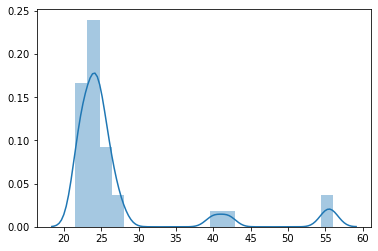

In [10]:
# Let us randomly pick 30 samples to infer the age of population 
sample_age=np.array([22.25,24.6,22.5,23.9,21.5,26.9,24.1,21.75,22.5,
                     26.0,40,42,56,55,25.1,25.75,26.3,24.75,24.5,24.75,25.75,21.75,23.08,24.75,24.25,22.5,27.75,22.25,24.25,23.8,23.4,23.9,23.25]) 
# pd.DataFrame(sample_age).hist();


sns.distplot(sample_age);

In [11]:
from scipy.stats import skew 
skew(sample_age)
# to check the skewness

2.565885204318749

In [12]:
# skew() => -0.5 to +0.5 is normal distribution

In [13]:
from scipy.stats import shapiro,wilcoxon 
# shapiro is to check if the data is normal or not

# SHAPIRO _ WIKIPEDIA
# The null-hypothesis of this test is that the population is normally distributed. 
# Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected 
# and there is evidence that the data tested are not normally distributed. On the other hand, 
# if the p value is greater than the chosen alpha level, 
# then the null hypothesis (that the data came from a normally distributed population) 
# can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less 
#                      than .05 rejects the null hypothesis 
# that the data are from a normally distributed population).[4]

# wilcoxon is for ttest for non parametric(skewed)
shapiro(sample_age)

ShapiroResult(statistic=0.5602236390113831, pvalue=8.782913951677074e-09)

In [14]:
# wilcoxon applies for 1 sample ttest also 
# wilcoxon internally applies log trasform to convert the skewed data to normal data


sample_age.mean()
# wilcoxon doesnt care abt the outliers as ot brings the outliers closer by log transform


26.994848484848482

In [36]:
# The above data sample_age is right skewed but mistakenly if we perform ttest_1samp,
# then the result could mislead us
ttest_1samp(sample_age,28)
# Here pvalue is greater than 0.05 so null hypothesis(avg age = 28 ) holds true but actually it's false

Ttest_1sampResult(statistic=-0.6750011880603076, pvalue=0.5045233332873951)

In [38]:
wilcoxon(sample_age-28)
# but here it rejects null hypothesis(avg mean = 28) 

WilcoxonResult(statistic=126.0, pvalue=0.005757247618942463)

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
A=pd.read_table('HR.txt',index_col=0)

In [41]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [42]:
# QUESTION 1:
# Check if there is any significant difference in salaries of male and female employees

# Ho : avg sal of male = avg sal of female
# Ha : avg sal of male not equal avg sal of female

In [44]:
A['Gender'].value_counts()

1    882
2    588
Name: Gender, dtype: int64

In [45]:
df_male = A[A['Gender'] == 1]
df_female = A[A['Gender'] == 2]

In [47]:
g1 = df_male['MonthlyIncome']
g2 = df_female['MonthlyIncome']

In [49]:
# test for normality - shapiro
shapiro(g1),shapiro(g2)
# here both the data is skewed as pvalue<0.5 which rejects null hypothesis(data is norma;)

(ShapiroResult(statistic=0.8169718384742737, pvalue=1.709933327621381e-30),
 ShapiroResult(statistic=0.8416616916656494, pvalue=9.378564564919968e-24))

In [50]:
# For two sample non parametric - independent we should use manwhitneyu and not wilcoxon
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=245722.5, pvalue=0.044208341633010594)

In [57]:
# INFERENCE : We reject Ho

# After rejecting Ho,we can do post_hoc analysis which says which group is greater
g1.describe().loc['mean'] ,g2.describe().loc['mean']
# avg salaries of female greater than avg salaries of men

(6380.507936507936, 6686.566326530612)

In [58]:
# QUESTION 2:
# Check if salary is one of the reason for attrition

In [59]:
A['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [61]:
df = A.groupby('Attrition')
df_att_yes = df.get_group('Yes')
df_att_no = df.get_group('No')

In [63]:
# test for normality - shapiro
shapiro(df_att_yes['MonthlyIncome']),shapiro(df_att_no['MonthlyIncome'])

(ShapiroResult(statistic=0.7798969745635986, pvalue=1.5025734172664523e-17),
 ShapiroResult(statistic=0.8341342210769653, pvalue=5.970143412461947e-34))

In [65]:
# data skewed
mannwhitneyu(df_att_yes['MonthlyIncome'],df_att_no['MonthlyIncome'])

MannwhitneyuResult(statistic=100620.5, pvalue=1.4754154586444366e-14)

In [68]:
df_att_yes['MonthlyIncome'].describe(),df_att_no['MonthlyIncome'].describe()

(count      237.000000
 mean      4787.092827
 std       3640.210367
 min       1009.000000
 25%       2373.000000
 50%       3202.000000
 75%       5916.000000
 max      19859.000000
 Name: MonthlyIncome, dtype: float64,
 count     1233.000000
 mean      6832.739659
 std       4818.208001
 min       1051.000000
 25%       3211.000000
 50%       5204.000000
 75%       8834.000000
 max      19999.000000
 Name: MonthlyIncome, dtype: float64)

In [70]:
# Question 3
# Does age play a role in attrition
# We alread have the groups in df_att_yes and df_att_no

# test for normality - shapiro
shapiro(df_att_yes['Age']),shapiro(df_att_no['Age'])

(ShapiroResult(statistic=0.9457082748413086, pvalue=1.0054400689796239e-07),
 ShapiroResult(statistic=0.9782127737998962, pvalue=1.1040232313422327e-12))

In [71]:
mannwhitneyu(df_att_yes['Age'],df_att_no['Age'])

MannwhitneyuResult(statistic=106859.0, pvalue=2.652171037670851e-11)

In [72]:
df_att_yes['Age'].describe(),df_att_no['Age'].describe()

(count    237.000000
 mean      33.607595
 std        9.689350
 min       18.000000
 25%       28.000000
 50%       32.000000
 75%       39.000000
 max       58.000000
 Name: Age, dtype: float64,
 count    1233.000000
 mean       37.561233
 std         8.888360
 min        18.000000
 25%        31.000000
 50%        36.000000
 75%        43.000000
 max        60.000000
 Name: Age, dtype: float64)

In [74]:
bank = pd.read_csv('Bank.csv')

In [75]:
bank.head()

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly


In [ ]:

# time 4:42

# ec1=(CT['female'].sum()*CT.loc['Aura'].sum())/M.shape[0] ec2=(CT['female'].sum()*CT.loc['Mixed'].sum())/M.shape[0] ec3=(CT['female'].sum()*CT.loc['No Aura'].sum())/M.shape[0] 
# ec4=(CT['male'].sum()*CT.loc['Aura'].sum())/M.shape[0] ec5=(CT['male'].sum()*CT.loc['Mixed'].sum())/M.shape[0] ec6=(CT['male'].sum()*CT.loc['No Aura'].sum())/M.shape[0] 
# PFA=1593/3545 PFM=291/3545 PFNA=1661/3545 PFA,PFM,PFNA 
# PMA=117/607 PMM=166/607 PMNA=324/607 PMA,PMM,PMNA 
# oc=np.array([1593,291,1661,117,166,324]) ec=np.array([ec1,ec2,ec3,ec4,ec5,ec6]) 
# chi_sq=np.sum((oc-ec)**2/ec) chi_sq 
# from scipy.stats import chi2_contingency 